In [1]:
%matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import tensorflow as tf
from PIL import Image
import numpy

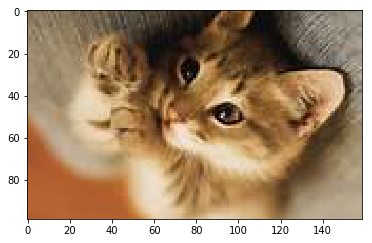

In [4]:
img = Image.open('data/kitty.jpeg')
plt.imshow(img)

In [5]:
def show_image_ops_gray(img, conv_op, sigmoid_op, avg_pool_op, max_pool_op):
    gs1 = gridspec.GridSpec(1, 5)
    plt.subplot(gs1[0, 0]); plt.axis('off'); plt.imshow(img[:, :], cmap=plt.get_cmap('gray'))
    plt.subplot(gs1[0, 1]); plt.axis('off'); plt.imshow(conv_op[0, :, :, 0], cmap=plt.get_cmap('gray'))
    plt.subplot(gs1[0, 2]); plt.axis('off'); plt.imshow(sigmoid_op[0, :, :, 0], cmap=plt.get_cmap('gray'))
    plt.subplot(gs1[0, 3]); plt.axis('off'); plt.imshow(avg_pool_op[0, :, :, 0], cmap=plt.get_cmap('gray'))
    plt.subplot(gs1[0, 4]); plt.axis('off'); plt.imshow(max_pool_op[0, :, :, 0], cmap=plt.get_cmap('gray'))
    plt.show()
            
    
def show_image_ops_rgb(img, conv_op, sigmoid_op, avg_pool_op, max_pool_op):
    gs1 = gridspec.GridSpec(1, 5)
    plt.subplot(gs1[0, 0]); plt.axis('off'); plt.imshow(img[:, :, :])
    plt.subplot(gs1[0, 1]); plt.axis('off'); plt.imshow(conv_op[0, :, :, :])
    plt.subplot(gs1[0, 2]); plt.axis('off'); plt.imshow(sigmoid_op[0, :, :, :])
    plt.subplot(gs1[0, 3]); plt.axis('off'); plt.imshow(avg_pool_op[0, :, :, :])
    plt.subplot(gs1[0, 4]); plt.axis('off'); plt.imshow(max_pool_op[0, :, :, :])
    plt.show()

def show_shapes(img, conv_op, sigmoid_op, avg_pool_op, max_pool_op):
    print("""
        image filters (shape {})
        conv_op filters (shape {})
        sigmoid_op filters (shape {})
        avg_pool_op filters (shape {})
        max_pool_op filters (shape {})
        """.format(
            img.shape, conv_op.shape, sigmoid_op.shape, avg_pool_op.shape, max_pool_op.shape))

In [8]:
def convolve(img, kernel, strides=[1, 3, 3, 1], pooling=[1, 3, 3, 1], padding='SAME', rgb=True):
    with tf.Graph().as_default():
        num_maps = 3
        if not rgb:
            num_maps = 1  # set number of maps to 1
            img = img.convert('L', (0.2989, 0.5870, 0.1140, 0))  # convert to gray scale
        
        
        # reshape image to have a leading 1 dimension
        img = numpy.asarray(img, dtype='float32') / 256.
        img_shape = img.shape
        img_reshaped = img.reshape(1, img_shape[0], img_shape[1], num_maps)
        
        x = tf.placeholder('float32', [1, None, None, num_maps])
        w = tf.get_variable('w', initializer=tf.to_float(kernel))
        
        # operations
        conv = tf.nn.conv2d(x, w, strides=strides, padding=padding)
        sig = tf.sigmoid(conv)
        max_pool = tf.nn.max_pool(sig, ksize=[1, 3, 3, 1], strides=[1, 3, 3, 1], padding=padding)
        avg_pool = tf.nn.avg_pool(sig, ksize=[1, 3, 3, 1], strides=[1, 3, 3, 1], padding=padding)
        
        init = tf.global_variables_initializer()
        with tf.Session() as session:
            session.run(init)
            conv_op, sigmoid_op, avg_pool_op, max_pool_op = session.run([conv, sig, avg_pool, max_pool],
                                                                        feed_dict={x: img_reshaped})
            
        show_shapes(img, conv_op, sigmoid_op, avg_pool_op, max_pool_op)
        if rgb:
            show_image_ops_rgb(img, conv_op, sigmoid_op, avg_pool_op, max_pool_op)
        else:
            show_image_ops_gray(img, conv_op, sigmoid_op, avg_pool_op, max_pool_op)


        image filters (shape (99, 159))
        conv_op filters (shape (1, 33, 53, 1))
        sigmoid_op filters (shape (1, 33, 53, 1))
        avg_pool_op filters (shape (1, 11, 18, 1))
        max_pool_op filters (shape (1, 11, 18, 1))
        


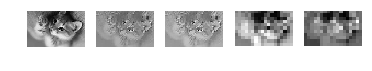


        image filters (shape (99, 159, 3))
        conv_op filters (shape (1, 33, 53, 3))
        sigmoid_op filters (shape (1, 33, 53, 3))
        avg_pool_op filters (shape (1, 11, 18, 3))
        max_pool_op filters (shape (1, 11, 18, 3))
        


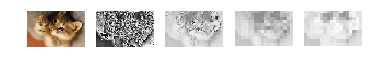

In [9]:
# sharpen
a = np.zeros([3, 3, 1, 1])
a[1, 1, :, :] = 5
a[0, 1, :, :] = -1
a[1, 0, :, :] = -1
a[2, 1, :, :] = -1
a[1, 2, :, :] = -1
convolve(img, a, rgb=False)

# sharpen rgb
a = np.zeros([3, 3, 3, 3])
a[1, 1, :, :] = 5
a[0, 1, :, :] = -1
a[1, 0, :, :] = -1
a[2, 1, :, :] = -1
a[1, 2, :, :] = -1
convolve(img, a)


        image filters (shape (99, 159))
        conv_op filters (shape (1, 33, 53, 1))
        sigmoid_op filters (shape (1, 33, 53, 1))
        avg_pool_op filters (shape (1, 11, 18, 1))
        max_pool_op filters (shape (1, 11, 18, 1))
        


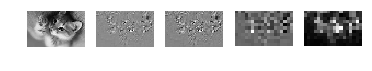

In [10]:
# outline
a = np.zeros([3, 3, 1, 1])
a[:, :, :, :] = -1
a[1, 1, :, :] = 8
convolve(img, a, rgb=False)


        image filters (shape (99, 159))
        conv_op filters (shape (1, 33, 53, 1))
        sigmoid_op filters (shape (1, 33, 53, 1))
        avg_pool_op filters (shape (1, 11, 18, 1))
        max_pool_op filters (shape (1, 11, 18, 1))
        


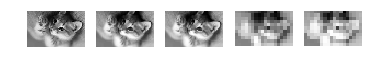


        image filters (shape (99, 159, 3))
        conv_op filters (shape (1, 33, 53, 3))
        sigmoid_op filters (shape (1, 33, 53, 3))
        avg_pool_op filters (shape (1, 11, 18, 3))
        max_pool_op filters (shape (1, 11, 18, 3))
        


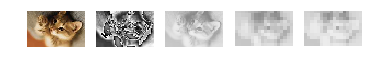

In [11]:
# blure
a = np.zeros([3, 3, 1, 1])
a[1, 1, :, :] = 0.25
a[0, 1, :, :] = 0.125
a[1, 0, :, :] = 0.125
a[2, 1, :, :] = 0.125
a[1, 2, :, :] = 0.125
a[0, 0, :, :] = 0.0625
a[0, 2, :, :] = 0.0625
a[2, 0, :, :] = 0.0625
a[2, 2, :, :] = 0.0625
convolve(img, a, rgb=False)

# blure
a = np.zeros([3, 3, 3, 3])
a[1, 1, :, :] = 0.25
a[0, 1, :, :] = 0.125
a[1, 0, :, :] = 0.125
a[2, 1, :, :] = 0.125
a[1, 2, :, :] = 0.125
a[0, 0, :, :] = 0.0625
a[0, 2, :, :] = 0.0625
a[2, 0, :, :] = 0.0625
a[2, 2, :, :] = 0.0625
convolve(img, a)


        image filters (shape (99, 159))
        conv_op filters (shape (1, 33, 53, 1))
        sigmoid_op filters (shape (1, 33, 53, 1))
        avg_pool_op filters (shape (1, 11, 18, 1))
        max_pool_op filters (shape (1, 11, 18, 1))
        


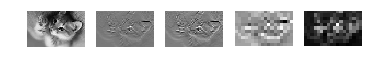

In [12]:
# top sobel
a = np.zeros([3, 3, 1, 1])
a[0, :, :, :] = 1
a[0, 1, :, :] = 2
a[2, :, :, :] = -1
a[2, 1, :, :] = -2
convolve(img, a, rgb=False)